<a href="https://colab.research.google.com/github/swaroopkasaraneni/DatasciencePython/blob/main/MLCase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Loading:
  1. Load the dataset “prisoners.csv” using pandas and display the first and last five rows in the dataset. [Hint: Refer to read_csv,head and tail methods in pandas]
  2. Use describe the method in pandas and find out the number of columns. Can you say something about those rows thathave zero inmates?[Hint: Use the loc attribute of the dataframe combined with conditional checks]

In [1]:
import pandas as pd

df = pd.read_csv("/content/prisoners.csv")

print(df.head())
print(df.tail())

print("\nDescription of the dataset:")
print(df.describe())

num_columns = df.shape[1]
print("\nNumber of columns in the dataset:", num_columns)

inmate_columns = df.columns[2:]
zero_inmates_rows = df.loc[(df[inmate_columns] == 0).all(axis=1)]
print("\nRows with zero inmates:")
print(zero_inmates_rows)


            STATE/UT  YEAR  No. of Inmates benefitted by Elementary Education  \
0     Andhra Pradesh  2013                                               9480   
1  Arunachal Pradesh  2013                                                  0   
2              Assam  2013                                                676   
3              Bihar  2013                                               1693   
4        Chhatisgarh  2013                                               1664   

   No. of Inmates benefitted by Adult Education  \
0                                         13758   
1                                             0   
2                                           750   
3                                          3013   
4                                          1803   

   No. of Inmates benefitted by Higher Education  \
0                                            672   
1                                              0   
2                                             14  

2.Data Manipulation:
  1. Create a new column -’total_benefitted’ that is a sum of inmates benefitted through all modes.[Hint: Use sum method with appropriate axis
  2. Create a new row -“totals” that is the sum of all inmates benefitted through each mode across all states.

In [4]:
df['total_benefitted'] = df.iloc[:, 2:].sum(axis=1)
print("Dataset with 'total_benefitted' column:")
print(df.head())


totals_row = df.iloc[:, 2:].sum(axis=0)
totals = pd.DataFrame(
    [['totals', 'all'] + totals_row.tolist()],
    columns=df.columns
)
df_with_totals = pd.concat([df, totals], ignore_index=True)
print("\nDataset with 'totals' row added:")
print(df_with_totals.tail())



Dataset with 'totals' row added:
       STATE/UT  YEAR  No. of Inmates benefitted by Elementary Education  \
31  Daman & Diu  2013                                                  0   
32        Delhi  2013                                               1458   
33  Lakshadweep  2013                                                  0   
34  Pondicherry  2013                                                  0   
35       totals   all                                              37027   

    No. of Inmates benefitted by Adult Education  \
31                                             0   
32                                          1187   
33                                             0   
34                                             0   
35                                         53720   

    No. of Inmates benefitted by Higher Education  \
31                                              0   
32                                            908   
33                                   

3.Plotting:
 1. Make a bar plot with each state name on the x-axisand their total benefitted inmates astheir bar heights. Which state has the maximum number of beneficiaries?[Hint: Use bar method of pyplot]


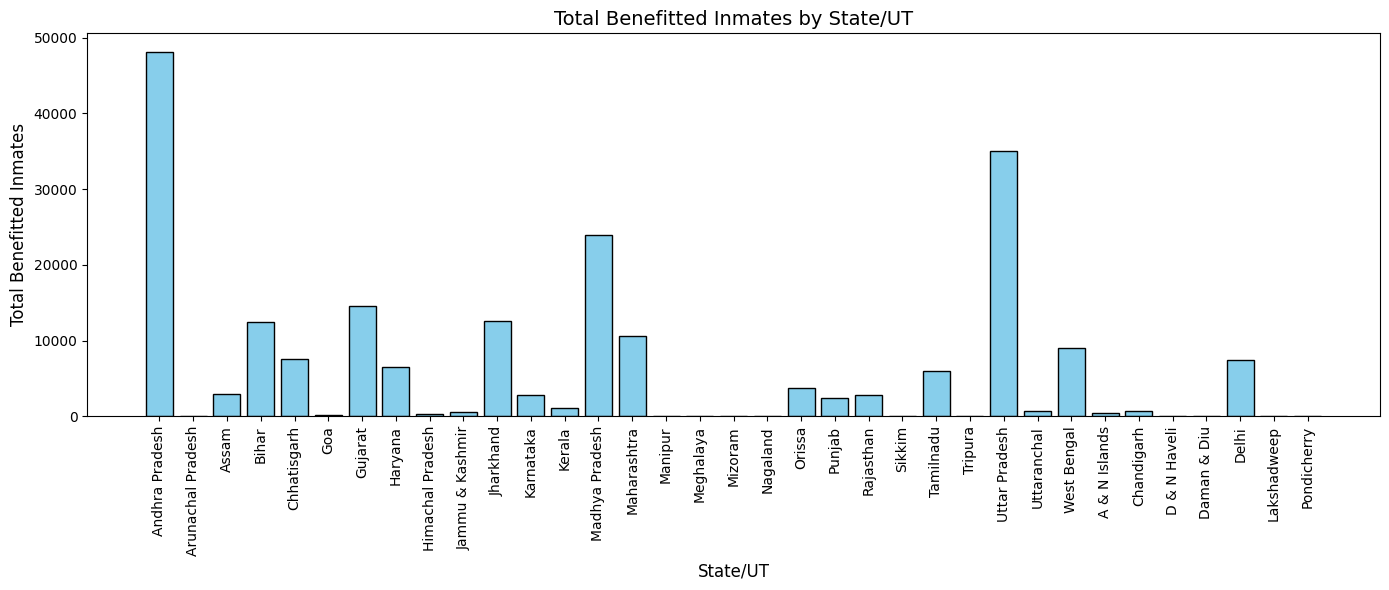

The state with the maximum number of beneficiaries is Andhra Pradesh with 48160 beneficiaries.


In [5]:
import matplotlib.pyplot as plt

# Ensure 'total_benefitted' column exists
if 'total_benefitted' not in df.columns:
    df['total_benefitted'] = df.iloc[:, 2:].sum(axis=1)

# Create the bar plot
plt.figure(figsize=(14, 6))
plt.bar(df['STATE/UT'], df['total_benefitted'], color='skyblue', edgecolor='black')
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Total Benefitted Inmates', fontsize=12)
plt.title('Total Benefitted Inmates by State/UT', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

# Find the state with the maximum number of beneficiaries
max_beneficiaries_state = df.loc[df['total_benefitted'].idxmax(), 'STATE/UT']
max_beneficiaries_value = df['total_benefitted'].max()

print(f"The state with the maximum number of beneficiaries is {max_beneficiaries_state} with {max_beneficiaries_value} beneficiaries.")


2. Make a pie chart that depicts the ratio among different modes of benefits.[Hint: Use pie method of pyplot]

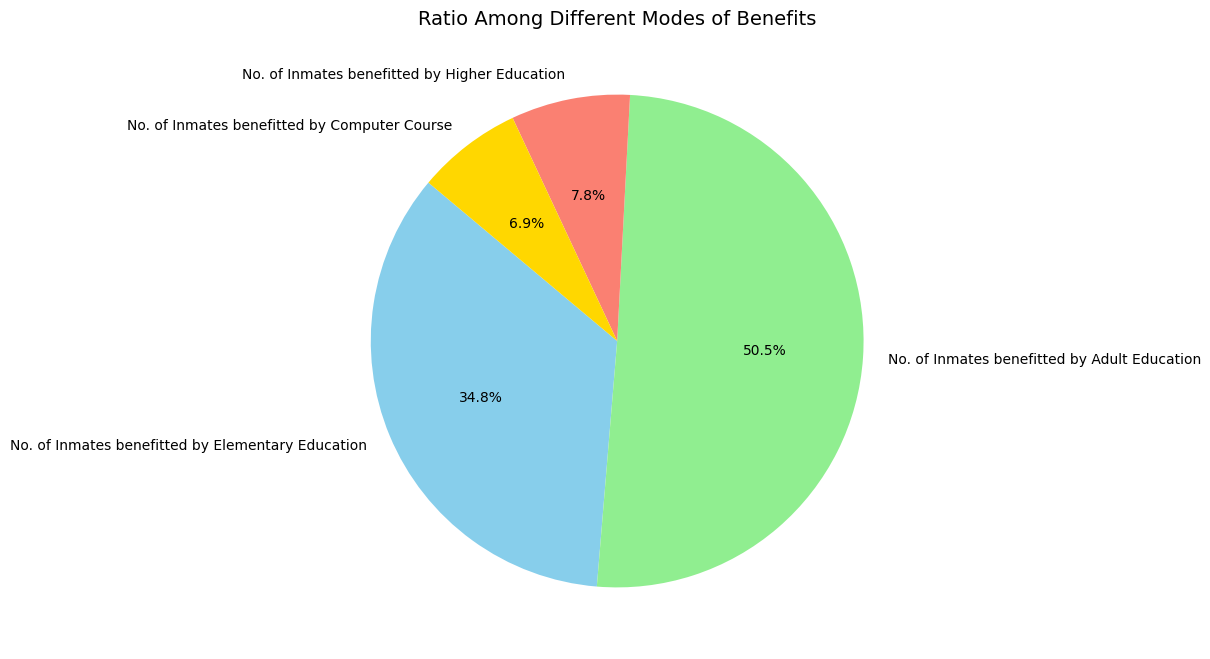

In [6]:
modes_of_benefit = df.iloc[:, 2:-1].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    modes_of_benefit,
    labels=modes_of_benefit.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightgreen', 'salmon', 'gold']
)
plt.title('Ratio Among Different Modes of Benefits', fontsize=14)
plt.show()
